In [1]:
## Program to stack images, enhancing image quality

import numpy as np                  # standard Python lib for math ops
#from scipy.misc import imsave       # save images as files
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import matplotlib.colors as colors
import glob, os                     # manage local files in your Compute containers

import astropy.io               #IMport various astropy functions
from astropy.io import fits
from astropy.io.fits import getdata
from astropy.io.fits import getval
from astropy.io.fits import getheader
from astropy.table import QTable
import astropy.units as u
from astropy.coordinates import SkyCoord 
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.stats import sigma_clipped_stats
from astropy import wcs
from astropy.wcs import WCS

import photutils                      #import photutils functions
from photutils import SkyCircularAperture
from photutils import CircularAperture
from photutils import SkyCircularAnnulus
from photutils import CircularAnnulus
from photutils import aperture_photometry

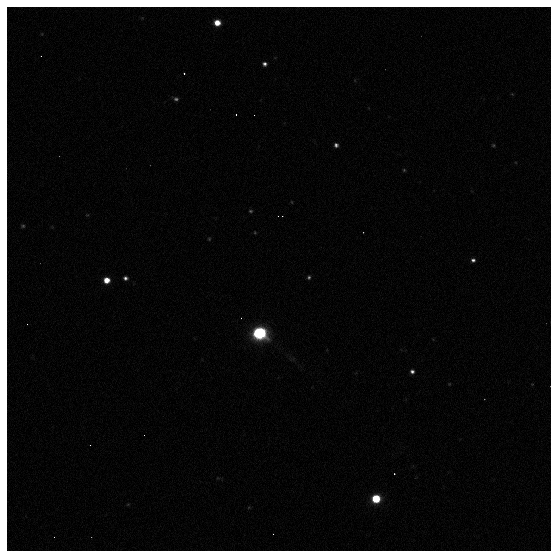

In [2]:
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project\RWAur_2017")
list = glob.glob("*.fits") #import all fits files in directory

im = getdata(list[175]) #specific image chosen

plt.figure(figsize=(10,10))  #plot image
plt.imshow(im,cmap='gray', origin = 'lower', vmin=0, vmax=150)
plt.xlim(500,1500)
plt.ylim(500,1500)
plt.axis('off')
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project") 
plt.savefig('example.jpg', bbox_inches='tight', pad_inches=0)

In [3]:
#define function for stack chosen images and enhance image quality

def stack(idx):
    images = []
    for i in range(0,len(idx)):
        x=idx[i]
        images.append(getdata(list[x])) #appends data from each image to array
    

    final = np.zeros(shape=images[0].shape)
    for image in images:
        final += image #stacks the data from each image in array into one image
    return final

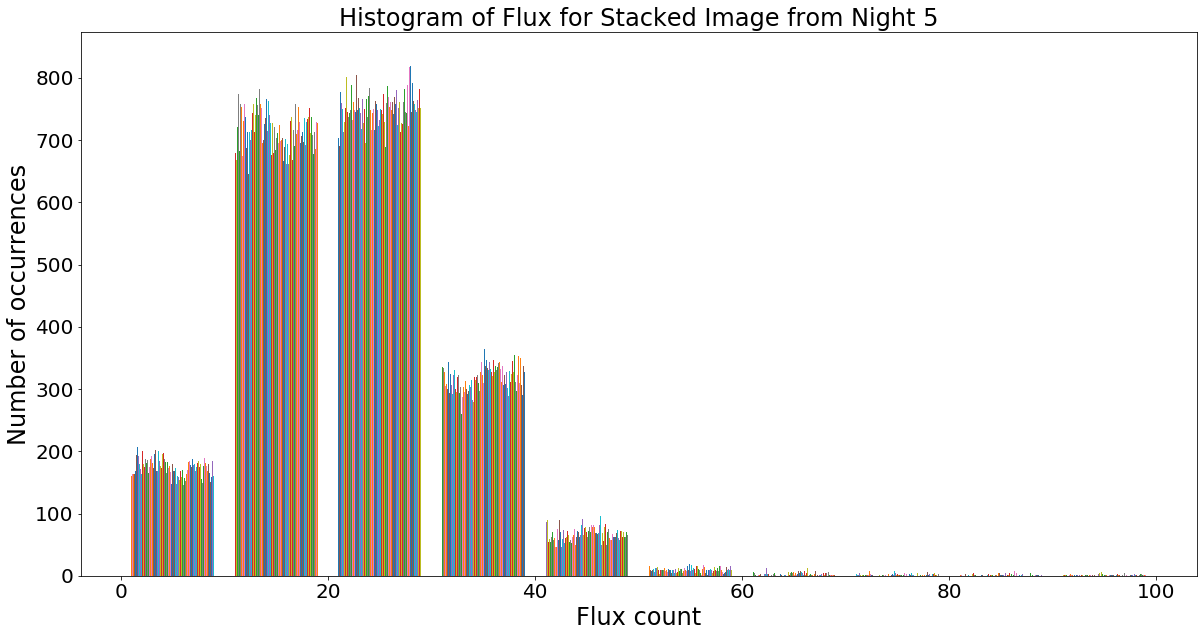

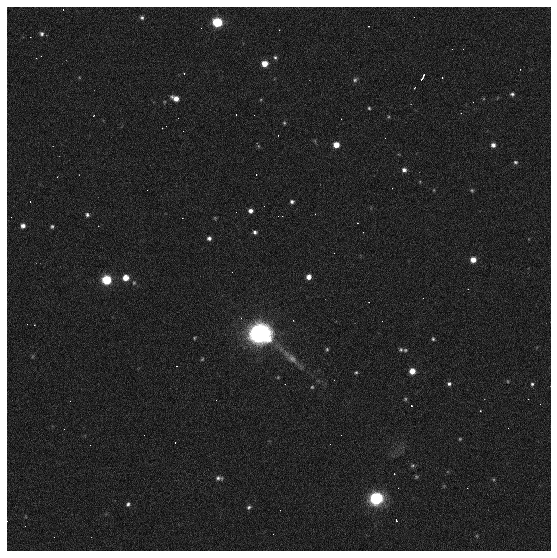

In [4]:
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project\RWAur_2017")

##Observation Night 5
idx5 =  [175,176,177,191,192,205] #indices of chosen images from night 5
final5 = stack(idx5)


#plotting histogram of flux in stacked image to determine optimum vmin and vmax values
plt.figure(figsize=(20,10))
plt.hist(final5,range=(0,100))
plt.title('Histogram of Flux for Stacked Image from Night 5',fontsize=24)
plt.xlabel('Flux count',fontsize=24)
plt.ylabel('Number of occurrences',fontsize=24)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project") 
plt.savefig('hist.jpg')#, bbox_inches='tight', pad_inches=0)

#plotting stacked image from night 5 using vmin and vmax values from histogram
plt.figure(figsize=(10,10))
plt.imshow(final5,cmap='gray', origin = 'lower', vmin=0, vmax=150)
plt.xlim(500,1500)
plt.ylim(500,1500)
plt.axis('off')
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project") 
plt.savefig('2017stack_night5.jpg', bbox_inches='tight', pad_inches=0)

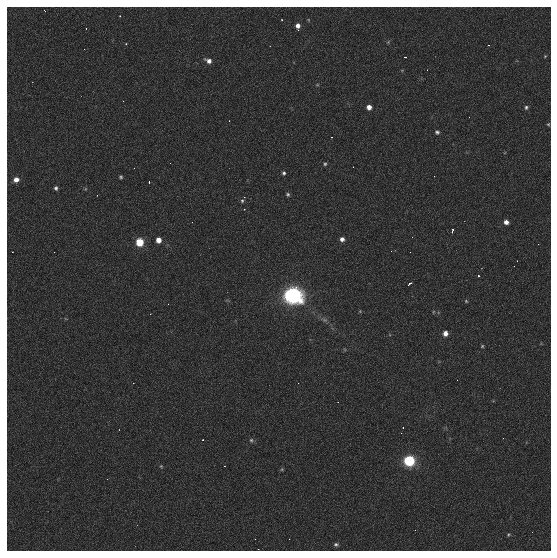

In [5]:
##Observation Night 1
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project\RWAur_2017")
list = glob.glob("*.fits")

idx1 =  [0,1,2,3,4,5,48,49] #indices of chosen images from night 1
final1 = stack(idx1)
    

#plotting stacked image from night 1
plt.figure(figsize=(10,10))
plt.imshow(final1,cmap='gray',vmin=0,vmax=150, origin = 'lower')
plt.xlim(500,1500)
plt.ylim(500,1500)
plt.axis('off')
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project") 
plt.savefig('2017stack_night1.jpg', bbox_inches='tight', pad_inches=0)

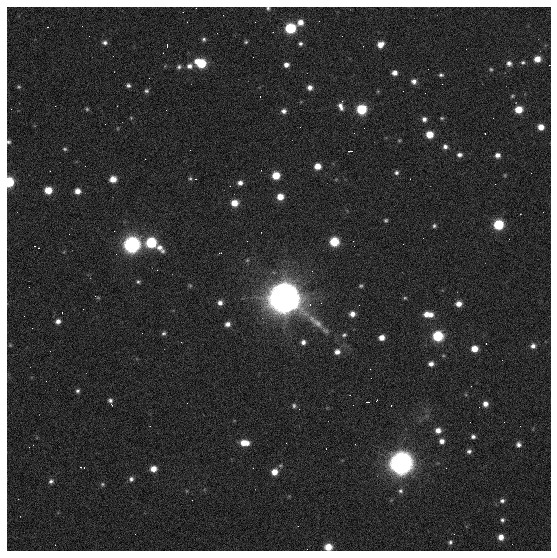

In [6]:
##images using Halpha20 filter
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project\RWAur_2017")
list = glob.glob("*.fits")

idx20 =  [64,65,66,67,68,69,88,90] #indices of chosen images in H-alpha filter
final20 = stack(idx20)
    

#plotting stacked h-alpha image
plt.figure(figsize=(10,10))
plt.imshow(final20,cmap='gray',vmin=300,vmax=600, origin = 'lower')
plt.xlim(500,1500)
plt.ylim(500,1500)
plt.axis('off')
os.chdir("C:\\Users\\atbri\\Documents\python\Masters project") 
plt.savefig('2017stack_Halpha20.jpg', bbox_inches='tight', pad_inches=0)